Project 1 (Tabular Data): Emma Brown, Katie Lark and Jocelyn Rosa. An analysis of the World Happiness Report

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import geopandas as gpd
import pycountry_convert as pc
import pycountry

In [2]:
import os
os.chdir('/Users/katielark/Downloads')
#get country data
geo = pd.read_csv('all.csv')

In [3]:
#explore country data
geo.columns

Index(['name', 'alpha-2', 'alpha-3', 'country-code', 'iso_3166-2', 'region',
       'sub-region', 'intermediate-region', 'region-code', 'sub-region-code',
       'intermediate-region-code'],
      dtype='object')

In [4]:
#eliminate redundant columns
geo.drop(['alpha-2', 'alpha-3', 'country-code', 'iso_3166-2', 'intermediate-region', 'intermediate-region-code'], axis=1, inplace = True)

In [5]:
#rename column
geo.rename(columns={'name': 'Country name'}, inplace = True)

In [6]:
#rename countries to match dataset from whr
geo['Country name'] = geo['Country name'].replace('United States of America', 'United States')
geo['Country name'] = geo['Country name'].replace('United Kingdom of Great Britain and Northern Ireland', 'United Kingdom')
geo['Country name'] = geo['Country name'].replace('Taiwan, Province of China', 'Taiwan Province of China')
geo['Country name'] = geo['Country name'].replace('Korea, Republic of', 'South Korea')
geo['Country name'] = geo['Country name'].replace('Moldova, Republic of', 'Moldova')
geo['Country name'] = geo['Country name'].replace('Iran (Islamic Republic of)','Iran')
geo['Country name'] = geo['Country name'].replace('Tanzania, United Republic of','Tanzania')
geo['Country name'] = geo['Country name'].replace('Congo, Democratic Republic of the','Congo (Kinshasa)')
geo['Country name'] = geo['Country name'].replace('Viet Nam', 'Vietnam')
geo['Country name'] = geo['Country name'].replace('Bolivia (Plurinational State of)', 'Bolivia')
geo['Country name'] = geo['Country name'].replace('Russian Federation', 'Russia')
geo['Country name'] = geo['Country name'].replace('Hong Kong', 'Hong Kong S.A.R. of China')
geo['Country name'] = geo['Country name'].replace('Congo', 'Congo (Brazzaville)')
geo['Country name'] = geo['Country name'].replace('Venezuela (Bolivarian Republic of)', 'Venezuela')
geo['Country name'] = geo['Country name'].replace("Lao People's Democratic Republic",'Laos')
geo['Country name'] = geo['Country name'].replace("Côte d'Ivoire",'Ivory Coast')
geo['Country name'] = geo['Country name'].replace('Palestine, State of','State of Palestine')
geo['Country name'] = geo['Country name'].replace('Turkey','Türkiye')
geo['Country name'] = geo['Country name'].replace('Syrian Arab Republic','Syria')

In [7]:
#to read excel
!pip install xlrd

In [8]:
#bring in whr
whr = pd.read_excel('DataForTable2.1.xls')

In [9]:
#merge countries and whr to create comprehensive dataset
happy = pd.merge(geo, whr, on='Country name', how='right')
happy

,Country name,region,sub-region,region-code,sub-region-code,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,Asia,Southern Asia,142.0,34.0,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.164055,0.881686,0.414297,0.258195
1,Afghanistan,Asia,Southern Asia,142.0,34.0,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.187297,0.850035,0.481421,0.237092
2,Afghanistan,Asia,Southern Asia,142.0,34.0,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.117861,0.706766,0.516907,0.275324
3,Afghanistan,Asia,Southern Asia,142.0,34.0,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.160098,0.731109,0.479835,0.267175
4,Afghanistan,Asia,Southern Asia,142.0,34.0,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.234157,0.775620,0.613513,0.267919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2358,Zimbabwe,Africa,Sub-Saharan Africa,2.0,202.0,2019,2.693523,7.697755,0.759162,53.099998,0.631908,-0.050874,0.830652,0.658434,0.235354
2359,Zimbabwe,Africa,Sub-Saharan Africa,2.0,202.0,2020,3.159802,7.596050,0.717243,53.575001,0.643303,0.002848,0.788523,0.660658,0.345736
2360,Zimbabwe,Africa,Sub-Saharan Africa,2.0,202.0,2021,3.154578,7.656878,0.685151,54.049999,0.667636,-0.079007,0.756945,0.609917,0.241682
2361,Zimbabwe,Africa,Sub-Saharan Africa,2.0,202.0,2022,3.296220,7.670073,0.666172,54.525002,0.651987,-0.072935,0.752632,0.640609,0.191350


In [10]:
#examine na in dataset
happy.isna().sum()

Country name                          0
region                               21
sub-region                           21
region-code                          21
sub-region-code                      21
year                                  0
Life Ladder                           0
Log GDP per capita                   28
Social support                       13
Healthy life expectancy at birth     63
Freedom to make life choices         36
Generosity                           81
Perceptions of corruption           125
Positive affect                      24
Negative affect                      16
dtype: int64

In [11]:
#identify countries missing from geo but in whr
happy_na = happy[happy['region'].isna()]
happy_na

,Country name,region,sub-region,region-code,sub-region-code,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
1100,Kosovo,NaN,NaN,NaN,NaN,2007,5.103906,NaN,0.847812,NaN,0.381364,NaN,0.894462,0.613723,0.236699
1101,Kosovo,NaN,NaN,NaN,NaN,2008,5.521660,8.858291,0.883843,NaN,NaN,0.093760,0.849059,0.499646,0.317828
1102,Kosovo,NaN,NaN,NaN,NaN,2009,5.891433,8.899382,0.830427,NaN,0.506415,0.202802,0.967839,0.527557,0.168830
1103,Kosovo,NaN,NaN,NaN,NaN,2010,5.176601,8.939567,0.707959,NaN,0.451444,0.170864,0.967272,0.672983,0.117717
1104,Kosovo,NaN,NaN,NaN,NaN,2011,4.859502,8.992258,0.759102,NaN,0.588979,0.003534,0.919212,0.603740,0.124438
1105,Kosovo,NaN,NaN,NaN,NaN,2012,5.639588,9.000282,0.757147,NaN,0.635793,0.027780,0.949651,0.561854,0.099630
1106,Kosovo,NaN,NaN,NaN,NaN,2013,6.125758,9.046240,0.720750,NaN,0.568463,0.114188,0.935095,0.649957,0.202731
1107,Kosovo,NaN,NaN,NaN,NaN,2014,5.000375,9.082124,0.705632,NaN,0.441391,0.009884,0.775201,0.551719,0.205950
1108,Kosovo,NaN,NaN,NaN,NaN,2015,5.077461,9.153252,0.805271,NaN,0.561048,0.177381,0.850647,0.684578,0.179989
1109,Kosovo,NaN,NaN,NaN,NaN,2016,5.759412,9.213440,0.823803,NaN,0.827399,0.120358,0.940898,0.588413,0.149607


In [12]:
#drop generosity column
happy.drop(['Generosity'], axis=1, inplace = True)

In [13]:
#see how many times each country appears in dataset
num_obs = happy['Country name'].value_counts()
num_obs

Country name
Lebanon      18
Jordan       18
Nicaragua    18
Nepal        18
Moldova      18
             ..
Cuba          1
Suriname      1
Guyana        1
Oman          1
Maldives      1
Name: count, Length: 165, dtype: int64

In [14]:
#create dataframe that takes average of all variables across time
avg = happy.groupby(['Country name']).agg(
    Avg_Life_Ladder=('Life Ladder', 'mean'),
    Avg_Log_GDP_per_Capita=('Log GDP per capita', 'mean'),
    Avg_Social_Support=('Social support', 'mean'),
    Avg_Life_Exp=('Healthy life expectancy at birth', 'mean'),
    Avg_Freedom=('Freedom to make life choices', 'mean'),
    Avg_Corruption=('Perceptions of corruption', 'mean'),
).reset_index()

In [16]:
#observe highest and lowest countries
avg.sort_values(by='Avg_Life_Ladder')
#Bottom 5: Afghanistan, South Sudan, Central African Republic, Burundi, Rwanda
#Top 5: Denmark, Finland, Iceland, Norway, Netherlands

,Country name,Avg_Life_Ladder,Avg_Log_GDP_per_Capita,Avg_Social_Support,Avg_Life_Exp,Avg_Freedom,Avg_Corruption
0,Afghanistan,3.219917,7.585624,0.476654,52.711667,0.480475,0.835824
135,South Sudan,3.401875,NaN,0.554719,53.101250,0.493705,0.749433
26,Central African Republic,3.514954,6.894669,0.402559,43.374000,0.680430,0.842129
22,Burundi,3.548124,6.682296,0.417652,52.008000,0.451014,0.732270
123,Rwanda,3.654473,7.427821,0.619421,57.570833,0.868012,0.185955
...,...,...,...,...,...,...,...
105,Netherlands,7.440393,10.897109,0.931286,71.164706,0.898639,0.416957
111,Norway,7.463886,11.074348,0.948437,71.030769,0.950521,0.327955
63,Iceland,7.467971,10.882743,0.978552,71.865909,0.929938,0.696472
48,Finland,7.624132,10.761079,0.951761,70.442501,0.942584,0.237706


In [17]:
#create dataframe without na from happy
corr = happy.dropna()

In [18]:
#create dataframe with columns of interest for correlation
corr_col = corr[['Life Ladder' , 'Log GDP per capita', 'Social support' , 'Healthy life expectancy at birth', 'Freedom to make life choices' , 'Perceptions of corruption']]
corr_col

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Perceptions of corruption
0,3.723590,7.350416,0.450662,50.500000,0.718114,0.881686
1,4.401778,7.508646,0.552308,50.799999,0.678896,0.850035
2,4.758381,7.613900,0.539075,51.099998,0.600127,0.706766
3,3.831719,7.581259,0.521104,51.400002,0.495901,0.731109
4,3.782938,7.660506,0.520637,51.700001,0.530935,0.775620
...,...,...,...,...,...,...
2358,2.693523,7.697755,0.759162,53.099998,0.631908,0.830652
2359,3.159802,7.596050,0.717243,53.575001,0.643303,0.788523
2360,3.154578,7.656878,0.685151,54.049999,0.667636,0.756945
2361,3.296220,7.670073,0.666172,54.525002,0.651987,0.752632


<Axes: >

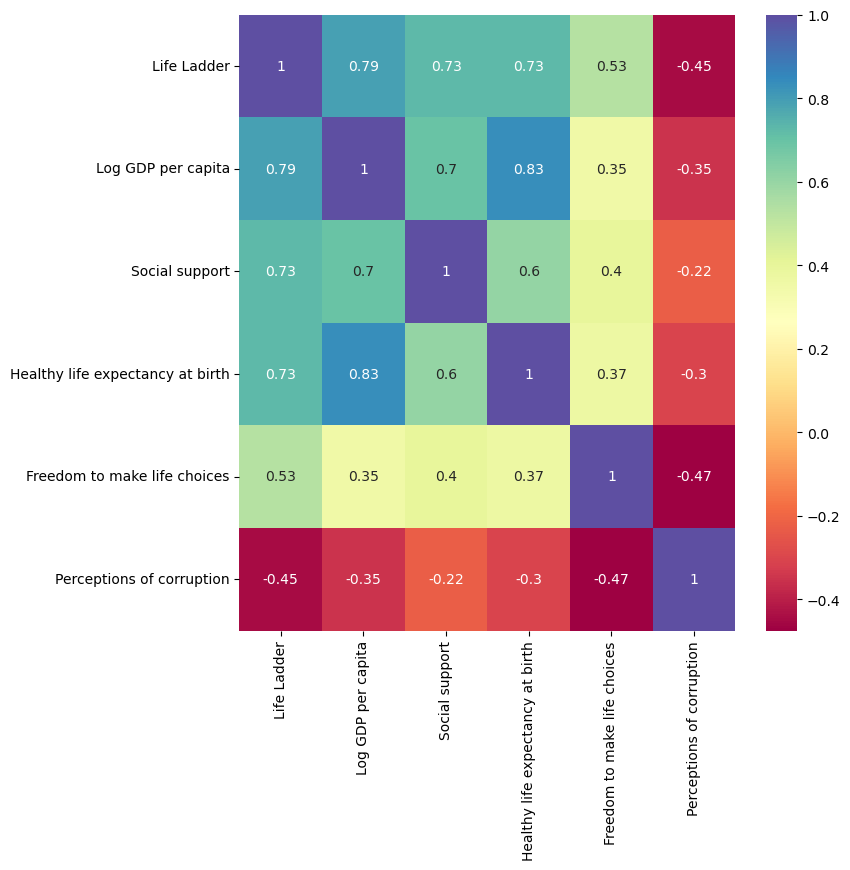

In [43]:
#create correlation heatmap of variables
plt.figure(figsize=(8,8))
sns.heatmap(corr_col.corr(), annot=True, cmap='Spectral')
#Life ladder highest correlation with LOG GDP per capita, negatively correlated with perceptions of corruption
#Perceptions of corruption negatively correlated with all other variables. Most neutrally correlated with social support.
#GDP per capita highly correlated with healthy life expectancy

In [20]:
#create table of average ladder score by region across years
happy_region = pd.pivot_table(happy, values='Life Ladder', columns=['region'], index=['year'], aggfunc="mean")
happy_region
#relatively consistent across years and regions

region,Africa,Americas,Asia,Europe,Oceania
year,,,,,
2005,5.167754,6.951275,5.804707,6.649996,7.340688
2006,4.074250,5.657247,5.183875,6.028384,7.305014
2007,4.435917,6.003432,5.240586,5.786235,7.444782
2008,4.296343,5.941702,5.104860,6.608667,7.317464
2009,4.397581,6.462181,5.313405,5.837234,NaN
2010,4.322769,6.296555,5.356255,5.957240,7.336902
2011,4.484178,6.172809,5.358830,5.969012,7.298127
2012,4.393943,6.200589,5.187477,6.100835,7.222608
2013,4.088387,6.269192,5.232656,6.000431,7.322160


<Axes: xlabel='year', ylabel='Life Ladder'>

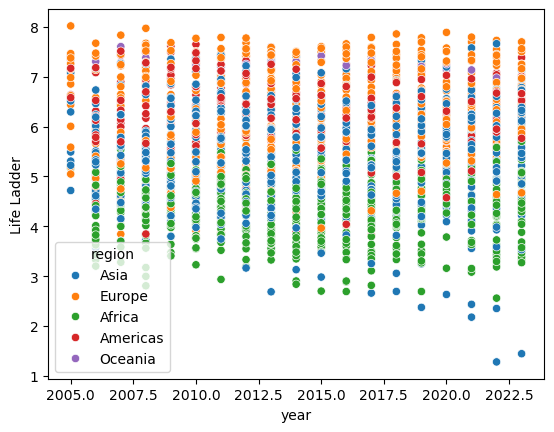

In [21]:
#create scatterplot of average Ladder score by country, colored by region, across years
sns.scatterplot(data=happy, x='year', y='Life Ladder', hue='region')
#Europe appears at the high end of the plot, Asia and Africa appear at the bottom end of the plot.

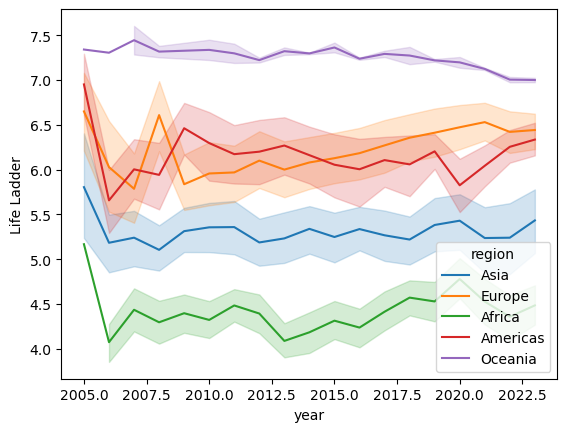

In [22]:
#display average Ladder score by region across years
lineplot = sns.lineplot(data=happy, x='year', y='Life Ladder', hue='region')
#Oceania is on average the happiest region- but it is notable that there are only 32 observations. 

In [23]:
#getting the right colors for the plots!
colors = lineplot.get_lines()
region_palette = {region: color.get_color() for region, color in zip(lineplot.get_legend_handles_labels()[1], colors)}

In [24]:
#create dataframe only containing usa
usa = happy[happy['Country name'] == 'United States'].sort_values('year')

<Axes: xlabel='year', ylabel='Life Ladder'>

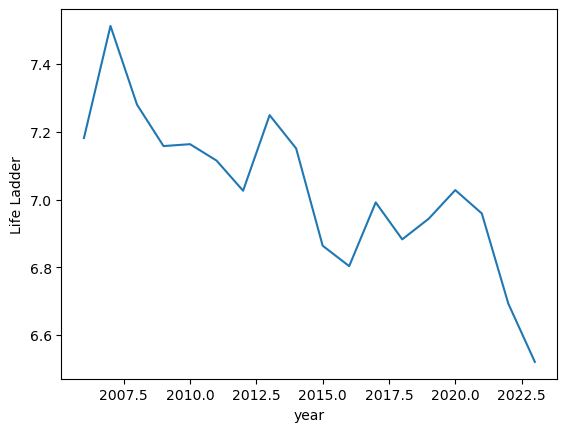

In [25]:
#graph usa ladder score across years
sns.lineplot(data=usa, x='year', y='Life Ladder')

In [26]:
countries = ['United States', 'Denmark', 'Afghanistan']
#looking at the happiest and saddest countries, relative to USA
usa_countries = happy[happy['Country name'].isin(countries)].sort_values('year')
#creating a dataframe that has just these countries

In [27]:
country_region_mapping = {
    'United States': 'Americas',
    'Denmark': 'Europe',
    'Afghanistan': 'Asia',
}

In [28]:
#getting the right colors for the lineplot!
country_palette = {country: region_palette[country_region_mapping[country]] for country in country_region_mapping if country in usa_countries['Country name'].values}

<Axes: xlabel='year', ylabel='Life Ladder'>

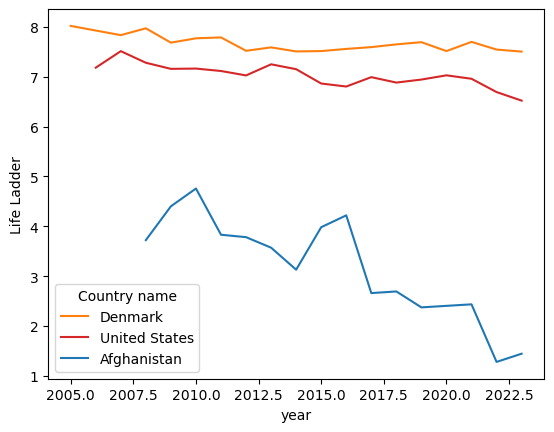

In [29]:
#plotting the USA relative to the happiest and saddest countries
sns.lineplot(data=usa_countries, x='year', y='Life Ladder', hue='Country name', palette=country_palette)

In [44]:
#preparing the dataframe for percent_change
happy.sort_values(by=['Country name', 'year'], inplace=True)

/var/folders/00/yzv7lrx12xq5_g14dw7m_2180000gn/T/ipykernel_69935/2978594603.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  happy.sort_values(by=['Country name', 'year'], inplace=True)


In [31]:
happy['Percent_Change'] = happy.groupby('Country name')['Life Ladder'].pct_change() * 100
happy
#Creating a percent_change column. Chatgpt demonstrated how to use the command pct_change()

,Country name,region,sub-region,region-code,sub-region-code,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Perceptions of corruption,Positive affect,Negative affect,Percent_Change
0,Afghanistan,Asia,Southern Asia,142.0,34.0,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.881686,0.414297,0.258195,NaN
1,Afghanistan,Asia,Southern Asia,142.0,34.0,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.850035,0.481421,0.237092,18.213293
2,Afghanistan,Asia,Southern Asia,142.0,34.0,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.706766,0.516907,0.275324,8.101332
3,Afghanistan,Asia,Southern Asia,142.0,34.0,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.731109,0.479835,0.267175,-19.474308
4,Afghanistan,Asia,Southern Asia,142.0,34.0,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.775620,0.613513,0.267919,-1.273100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2358,Zimbabwe,Africa,Sub-Saharan Africa,2.0,202.0,2019,2.693523,7.697755,0.759162,53.099998,0.631908,0.830652,0.658434,0.235354,-25.520858
2359,Zimbabwe,Africa,Sub-Saharan Africa,2.0,202.0,2020,3.159802,7.596050,0.717243,53.575001,0.643303,0.788523,0.660658,0.345736,17.311120
2360,Zimbabwe,Africa,Sub-Saharan Africa,2.0,202.0,2021,3.154578,7.656878,0.685151,54.049999,0.667636,0.756945,0.609917,0.241682,-0.165326
2361,Zimbabwe,Africa,Sub-Saharan Africa,2.0,202.0,2022,3.296220,7.670073,0.666172,54.525002,0.651987,0.752632,0.640609,0.191350,4.490026


In [32]:
happy.sort_values(by=['Percent_Change'], inplace=True)

In [33]:
happy['Percent_Change'].mean()
#overall, life ladder scores remain relatively consistent.

0.5510086377876782

In [34]:
happy_change = happy[happy['Percent_Change'].notna()]
happy_change

,Country name,region,sub-region,region-code,sub-region-code,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Perceptions of corruption,Positive affect,Negative affect,Percent_Change
13,Afghanistan,Asia,Southern Asia,142.0,34.0,2022,1.281271,NaN,0.228217,54.875000,0.368377,0.733198,0.205868,0.575512,-47.403408
1204,Liberia,Africa,Sub-Saharan Africa,2.0,202.0,2015,2.701591,7.365848,0.637666,52.500000,0.671431,0.902673,0.519482,0.388489,-40.902571
9,Afghanistan,Asia,Southern Asia,142.0,34.0,2017,2.661718,7.647830,0.490880,53.250000,0.427011,0.954393,0.435270,0.371326,-36.928630
2342,Zambia,Africa,Sub-Saharan Africa,2.0,202.0,2021,3.082155,8.082337,0.619071,55.250000,0.832574,0.824031,0.655690,0.348551,-36.292684
247,Botswana,Africa,Sub-Saharan Africa,2.0,202.0,2010,3.553020,9.445679,0.865625,50.599998,0.826219,0.813985,0.616944,0.172184,-34.820687
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,Egypt,Africa,Northern Africa,2.0,15.0,2014,4.885073,9.241709,0.618551,61.939999,0.577938,0.749143,0.477180,0.327350,37.278202
249,Botswana,Africa,Sub-Saharan Africa,2.0,202.0,2012,4.835939,9.470853,0.836743,51.480000,0.799410,0.814423,0.694941,0.171257,37.387710
1824,Sierra Leone,Africa,Sub-Saharan Africa,2.0,202.0,2010,4.133956,7.245167,0.811873,47.799999,0.726269,0.910441,0.497324,0.290469,37.924915
2341,Zambia,Africa,Sub-Saharan Africa,2.0,202.0,2020,4.837992,8.065784,0.766872,54.825001,0.750422,0.809750,0.679043,0.344526,46.304501


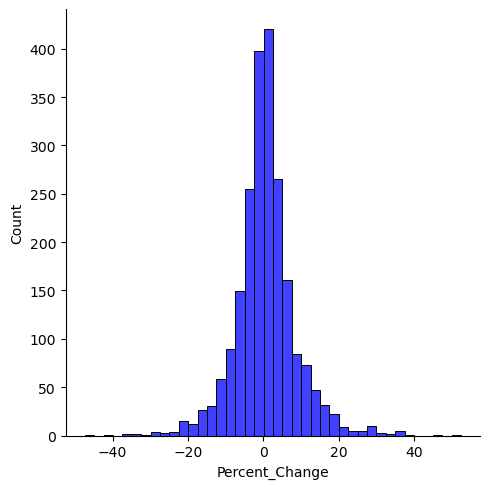

In [35]:
sns.displot(happy['Percent_Change'], bins = 40, color = 'blue')
#percent change fairly normally distributed about 0: happiness scores are relatively consistent. 

In [36]:
happy_change = happy.groupby(['year']).agg(
    Percent_Change = ('Percent_Change', 'mean')
).reset_index()
happy_change
#2006 had a shockingly low percent change. This is likely due to the extremely small number of countries for which we had data in 2006

,year,Percent_Change
0,2005,NaN
1,2006,-10.483918
2,2007,2.900426
3,2008,0.567956
4,2009,1.271172
5,2010,0.157914
6,2011,0.898519
7,2012,-0.918647
8,2013,-0.556396
9,2014,0.470001


In [37]:
happy.groupby("year").count()

,Country name,region,sub-region,region-code,sub-region-code,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Perceptions of corruption,Positive affect,Negative affect,Percent_Change
year,,,,,,,,,,,,,,
2005,27,27,27,27,27,27,27,27,27,25,25,26,26,0
2006,89,89,89,89,89,89,88,89,87,86,83,88,88,3
2007,102,101,101,101,101,102,101,100,100,101,98,99,102,86
2008,110,109,109,109,109,110,110,110,107,107,107,109,110,103
2009,114,112,112,112,112,114,113,113,110,112,111,113,113,103
2010,124,122,122,122,122,124,123,120,120,122,119,120,120,122
2011,146,144,144,144,144,146,145,145,141,145,138,145,146,139
2012,141,139,139,139,139,141,140,141,136,140,131,141,141,137
2013,136,135,135,135,135,136,136,136,133,135,129,134,136,135


In [38]:
happy = happy[happy['year'] != 2006]
#eliminating 2006 from the dataset due to its small number of values.

In [39]:
happy.groupby("region").count()
#Asia has the highest number of countries across the years, Oceania has the fewest (significantly). 

,Country name,sub-region,region-code,sub-region-code,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Perceptions of corruption,Positive affect,Negative affect,Percent_Change
region,,,,,,,,,,,,,,
Africa,562,562,562,562,562,562,557,558,562,559,547,558,558,536
Americas,364,364,364,364,364,364,360,362,364,364,364,364,364,357
Asia,676,676,676,676,676,676,664,669,636,647,578,658,665,657
Europe,618,618,618,618,618,618,617,618,618,618,612,617,618,594
Oceania,33,33,33,33,33,33,33,33,33,33,33,33,33,32


<Axes: xlabel='year', ylabel='Percent_Change'>

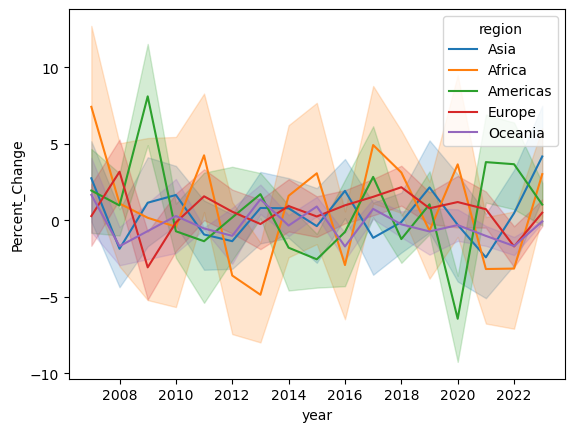

In [40]:
sns.lineplot(data=happy, x='year', y='Percent_Change', hue='region')
#The Americas has an elastic ladder score, as well as Africa. The other regions are relatively more stable. 
#The Americas experience a significant drop in 2020, while Africa spikes during that time.
#Notably, Africa has a downward spike in 2021. Additionally, the region experiences a downward spike in 2013. 

In [ ]:
# Function to get the continent from a country name
def country_to_continent(country_name):
    try:
        country_alpha2 = pycountry.countries.lookup(country_name).alpha_2
        continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
        continents = {
            'AF': 'Africa',
            'NA': 'North America',
            'SA': 'South America',
            'AS': 'Asia',
            'OC': 'Oceania',
            'EU': 'Europe',
            'AN': 'Antarctica'
        }
        return continents[continent_code]
    except Exception as e:
        print(f"Error: {e} for country {country_name}")  # Log error
        return None  # Return None if the country name is not recognized

geo = pd.read_excel('DataForTable2.1.xls')

# Rename the country names in your geo DataFrame
geo.rename(columns={'name': 'Country name'}, inplace=True)

# Apply the function to your 'Country name' column
geo['Continent'] = geo['Country name'].apply(country_to_continent)

# Load the world map from GeoPandas datasets
world = gpd.read_file('/Users/katielark/Downloads/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp')

# Combine Denmark and Greenland
denmark = world[world['SOVEREIGNT'] == 'Denmark']
greenland = world[world['SOVEREIGNT'] == 'Greenland']

combined_geometry = denmark.geometry.unary_union.union(greenland.geometry.unary_union)
world.loc[world['SOVEREIGNT'] == 'Denmark', 'geometry'] = combined_geometry
world = world[world['SOVEREIGNT'] != 'Greenland']

# Country name mapping
country_mapping = {
    'United States': 'United States of America',
    'Congo (Kinshasa)': 'Dem. Rep. Congo',
    'Congo (Brazzaville)': 'Congo', 
    'Bosnia': 'Bosnia and Herzegovina',
    'South Sudan': 'S. Sudan',
    'North Sudan': 'N. Sudan',
    'Türkiye': 'Turkey',
    'Ivory Coast': "Côte d'Ivoire",  
    'Central African Republic': 'Central African Rep.' 
}

# Replace country names in your dataset
geo['Country name'] = geo['Country name'].replace(country_mapping)

# Merge your data with the world map data on country name
merged = world.merge(geo, how="left", left_on="SOVEREIGNT", right_on="Country name")

# Plot the updated world map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged.plot(column='Life Ladder', cmap='Spectral', legend=True, 
            legend_kwds={'label': "Average Happiness Score (Life Ladder) by Continent",
                         'orientation': "horizontal"}, ax=ax)

# Add a title
plt.title('World Happiness Map', fontsize=16)

# Show the map
plt.show()

#The map demonstrates that countries are generally similarly-colored (have similar life ladder scores) to those around them. 
#Blue countries (and the happiest 5) are concentrated in Europe. 
#Orange/red countries (and the saddest 5) are concentrated in Africa and Asia. 